In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("config_output_0_bg/output.csv", index_col=False)

C:\Users\duanh\AppData\Local\Temp/ipykernel_31684/3492058307.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("config_output_0_bg/output.csv", index_col=False)


In [5]:
df = df.dropna()
df.head()

,Sim,Time step,Color,X,Y,Reward,Move,Color.1,X.1,Y.1,Reward.1,Move.1,
0,1,1,green,1.0,5.0,0.0,Go,red,5.0,1.0,0.0,Go,
1,1,2,green,2.0,5.0,-2.0,Go,red,5.0,2.0,-2.0,Go,
2,1,3,green,3.0,5.0,-4.0,Go,red,5.0,3.0,-4.0,Stop,
3,1,4,green,4.0,5.0,-6.0,Go,red,5.0,3.0,-6.0,Stop,
4,1,5,green,5.0,5.0,-8.0,Go,red,5.0,3.0,-8.0,Go,


In [33]:
df = df.dropna()

In [60]:
green_stop = 0
red_stop = 0
for i in range(len(df)):
    if df[' Move'].to_list()[i] == ' Stop':
        green_stop += 1
    if df[' Move.1'].to_list()[i] == ' Stop':
        red_stop += 1
        
green_stop, red_stop

(407, 414)

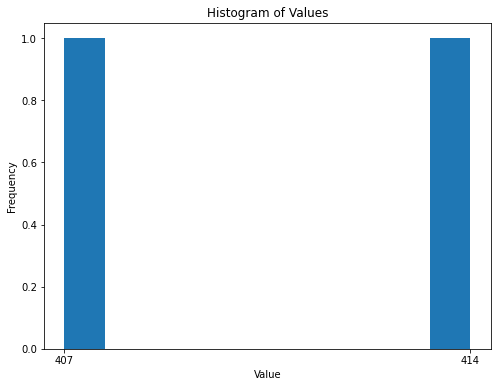

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist([green_stop, red_stop])
plt.xticks([green_stop, red_stop])
plt.show()

In [ ]:
# Early stop(not in 4,5 or 5,4)
# Stop before intersection(in 4,5 or 5,4)
# Stop simultaneously (Both stop)
# Success rate
# Cumulative reward after each simulation

# With bg
# Success rate